In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/마케팅_전처리/마케팅.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,섬세이 브랜드의 바운더리 및 팀원의 시야를 확장시킵니다 해외 신규 제휴처 확보 및 ...,25년차 학력 무관 영어 소통하는 것에 능숙하신 분 미국 시장에 대한 이해도가 높...
1,우리 스쿼드에서는 이런 비전과 목표를 가지고 있어요 강남언니 팀 마케팅 스쿼드에서...,3년 이상의 CRM 또는 타겟 마케팅 관련 경력을 보유하신 분 다양한 데이터에 기...
2,파워볼PGB게임 시장분석 및 단계별 브랜딩 전략 수립 전반 게임 광고 기획 제작 ...,필수 포트폴리오 보유자 5년 이상의 웹보드 스포츠 등 게임 또는 관련 분야의 마케...
3,올해 1월 런칭한 신용관리 서비스 크레딧플래닛 온라인투자연계금융 서비스 피플펀드...,3년 이상의 그로스 CRM 마케팅 경력 또는 그에 준하는 경험을 가지신 분 A...
4,퍼포먼스 마케터는 주로 이런 업무를 해요 Google Tiktok Meta Ad ...,이런 분과 함께하고 싶어요 퍼포먼스 마케팅UA 이외 퍼포먼스 액션 포함 경력 5년...
...,...,...
469,미소의 미션은 현실의 삶을 개선하는 기술을 만듭니다 We build technolo...,이런 분과 함께하고 싶습니다 퍼포먼스 마케팅 관련 경력 2년 이상이거나 그에 준하는...
470,그로스 마케팅 전반의 업무 마케팅 외주 협력사 핸들링 고객 퍼널별 마케팅 플랜 수...,학력 고등학교 졸업 이상 경력 2년 이상 데이터 기반 분석계획 수립개선이 가능...
471,네이버구글 등 SA 광고 운영 제품별 SA 광고 목표 및 전략 수립 제품별 SA ...,유관 경력 1년 이상 네이버구글 등의 SA 광고에서 성과를 개선한 경험이 있는 분...
472,벳칭 프로덕트 기획 및 관리 벳칭 주요 마케팅 및 영업 에셋 기획 제작서비스 소개...,계획실행확인조치PDCA 사이클와 같이 구조적인 업무 수행이 가능한 분 회사 및 제...


In [3]:
#사용할 column 선택
df = df[['주요 업무']]
df

,주요 업무
0,섬세이 브랜드의 바운더리 및 팀원의 시야를 확장시킵니다 해외 신규 제휴처 확보 및 ...
1,우리 스쿼드에서는 이런 비전과 목표를 가지고 있어요 강남언니 팀 마케팅 스쿼드에서...
2,파워볼PGB게임 시장분석 및 단계별 브랜딩 전략 수립 전반 게임 광고 기획 제작 ...
3,올해 1월 런칭한 신용관리 서비스 크레딧플래닛 온라인투자연계금융 서비스 피플펀드...
4,퍼포먼스 마케터는 주로 이런 업무를 해요 Google Tiktok Meta Ad ...
...,...
469,미소의 미션은 현실의 삶을 개선하는 기술을 만듭니다 We build technolo...
470,그로스 마케팅 전반의 업무 마케팅 외주 협력사 핸들링 고객 퍼널별 마케팅 플랜 수...
471,네이버구글 등 SA 광고 운영 제품별 SA 광고 목표 및 전략 수립 제품별 SA ...
472,벳칭 프로덕트 기획 및 관리 벳칭 주요 마케팅 및 영업 에셋 기획 제작서비스 소개...


In [4]:
#txt로 저장
i = 'C:/Users/User/Desktop/마케팅_전처리/마케팅(주요업무).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [5]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'주요 업무\n섬세이 브랜드의 바운더리 및 팀원의 시야를 확장시킵니다 해외 신규 제휴처 확보 및 관리 커뮤니케이션 해외팀 광고 관리 커뮤니케이션 콘텐츠 촬영 커뮤니케이션 해외 샘플 출고 및 정산 필수 제출서류 1 중요 나는 어떻게 살다 가고 싶은가를 생각해보고 적어 제출해주세요 분량 자유2 자기소개서 및 경력기술 포함 이력서\n 우리 스쿼드에서는 이런 비전과 목표를 가지고 있어요 강남언니 팀 마케팅 스쿼드에서는 성형피부시술 1위 정보앱 강남언니가 지속적으로 성장할 수 있도록 효율적인 광고 운영 및 콘텐츠 기획을 진행해요 이를 통해 장기적으로 병원과 유저간의 성형피부시술의 문화를 바꿔가며 압도적인 업계 1위 서비스를 달성하는 것을 목표로 삼고 있어요 강남언니 팀 스쿼드란스쿼드는 문제의식과 목적으로 모인 팀으로 문제를 해결하기 위한 가장 효율적이고 작은 단위의 팀입니다 이런 일들을 경험하고 성장할 수 있어요 강남언니 팀의 CRM 마케터는 유저가 강남언니를 떠나지 않도록 유저 경험을 최적화하는 역할을 담당합니다 유저 데이터를 분석해 세그먼테이션을 정의하고 맞춤화된 커뮤니케이션 전략을 수립해요 나의 액션에 따른 결과를 다양한 내부 데이터를 통해 확인하고 고도화해나갈 수 있어요 앱 푸시 이메일 인앱 배너 등 다양한 툴을 활용해 무궁무진한 CRM 전략을 실행해볼 수 있답니다 앞으로 이런 일들을 하게 될거에요  유저의 행동 데이터 분석을 통해 강남언니에 최적화된 유저 세그먼테이션 설계 및 CRM 전략 수립 유저의 퍼널속성액션별 최적의 타이밍에 개입해 비용 효율적인 구매 유도 캠페인을 발굴 다양한 채널푸시 IAM SMS 알림톡을 활용하여 상품 제안 및 유저 관리 AB 테스트 및 캠페인 실행 결과에 대한 성과 관리 체계를 구축하고 효과와 효율 최적화\n 파워볼PGB게임 시장분석 및 단계별 브랜딩 전략 수립 전반 게임 광고 기획 제작 및 매체 집행 타사 제품 및 시장 리서치 비교 분석 기획 운영 등 내부 멤버들과의 민첩한 커뮤니케이션\n  올해 1월 런칭한 신용관리 서비스 크레

In [6]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['주요',
 '업무',
 '섬세',
 '브랜드',
 '바운',
 '및',
 '팀',
 '시야',
 '확장',
 '해외',
 '신규',
 '제휴',
 '처',
 '확보',
 '및',
 '관리',
 '커뮤니케이션',
 '해외',
 '팀',
 '광고',
 '관리',
 '커뮤니케이션',
 '콘텐츠',
 '촬영',
 '커뮤니케이션',
 '해외',
 '샘플',
 '출고',
 '및',
 '정산',
 '필수',
 '제출',
 '서류',
 '중요',
 '나',
 '생각',
 '제출',
 '분량',
 '자유',
 '자기',
 '소개',
 '및',
 '경력',
 '기술',
 '포함',
 '이력서',
 '우리',
 '스쿼드',
 '비',
 '전과',
 '목표',
 '가지',
 '강남',
 '팀',
 '마케팅',
 '스쿼드',
 '성형',
 '피부',
 '시술',
 '위',
 '정보',
 '앱',
 '강남',
 '지속',
 '수',
 '효율',
 '광고',
 '운영',
 '및',
 '콘텐츠',
 '기획',
 '진행',
 '통해',
 '장기',
 '병원',
 '유저',
 '성형',
 '피부',
 '시술',
 '문화',
 '압도',
 '업계',
 '위',
 '서비스',
 '달성',
 '것',
 '목표',
 '삼고',
 '강남',
 '팀',
 '스쿼드',
 '란스',
 '의식',
 '목적',
 '팀',
 '문제',
 '해결',
 '위',
 '가장',
 '효율',
 '단위',
 '팀',
 '일',
 '경험',
 '수',
 '강남',
 '팀',
 '마케터',
 '유저',
 '강남',
 '유저',
 '경험',
 '최적화',
 '역할',
 '담당',
 '유저',
 '데이터',
 '분석',
 '그',
 '션',
 '정의',
 '맞춤화',
 '커뮤니케이션',
 '전략',
 '수립',
 '나',
 '액션',
 '결과',
 '내부',
 '데이터',
 '통해',
 '확인',
 '고도화',
 '수',
 '앱',
 '푸시',
 '이메일',
 '인앱',
 '배너',
 '등',
 '툴',
 '활용',
 '무궁

In [7]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

20696
1518


FreqDist({'및': 1298, '기획': 722, '마케팅': 651, '운영': 523, '광고': 407, '관리': 392, '콘텐츠': 376, '전략': 350, '등': 340, '분석': 285, ...})

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [9]:
stop_words = [
    '제작','수립','신규','업무','사','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['주요',
 '섬세',
 '브랜드',
 '바운',
 '시야',
 '확장',
 '해외',
 '제휴',
 '처',
 '확보',
 '관리',
 '커뮤니케이션',
 '해외',
 '광고',
 '관리',
 '커뮤니케이션',
 '콘텐츠',
 '촬영',
 '커뮤니케이션',
 '해외',
 '샘플',
 '출고',
 '정산',
 '필수',
 '제출',
 '서류',
 '중요',
 '나',
 '생각',
 '제출',
 '분량',
 '자유',
 '자기',
 '소개',
 '기술',
 '포함',
 '이력서',
 '우리',
 '스쿼드',
 '비',
 '전과',
 '목표',
 '가지',
 '강남',
 '마케팅',
 '스쿼드',
 '성형',
 '피부',
 '시술',
 '정보',
 '앱',
 '강남',
 '지속',
 '효율',
 '광고',
 '운영',
 '콘텐츠',
 '기획',
 '진행',
 '통해',
 '장기',
 '병원',
 '유저',
 '성형',
 '피부',
 '시술',
 '문화',
 '압도',
 '업계',
 '서비스',
 '달성',
 '것',
 '목표',
 '삼고',
 '강남',
 '스쿼드',
 '란스',
 '의식',
 '목적',
 '문제',
 '가장',
 '효율',
 '단위',
 '경험',
 '강남',
 '마케터',
 '유저',
 '강남',
 '유저',
 '경험',
 '최적화',
 '역할',
 '담당',
 '유저',
 '데이터',
 '분석',
 '그',
 '션',
 '정의',
 '맞춤화',
 '커뮤니케이션',
 '전략',
 '나',
 '액션',
 '결과',
 '내부',
 '데이터',
 '통해',
 '확인',
 '고도화',
 '앱',
 '푸시',
 '이메일',
 '인앱',
 '배너',
 '툴',
 '활용',
 '무궁무진',
 '전략',
 '실행',
 '앞',
 '유저',
 '행동',
 '데이터',
 '분석',
 '통해',
 '강남',
 '최적화',
 '유저',
 '그',
 '션',
 '설계',
 '전략',
 '유저',
 '퍼널',
 '속성',
 '액션',
 '별',
 '최적',
 '타이밍

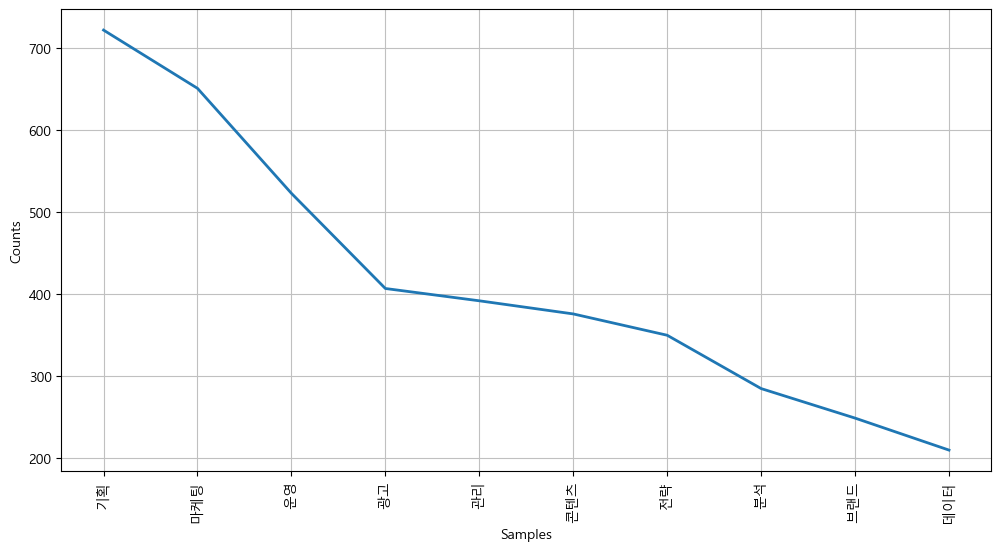

In [10]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

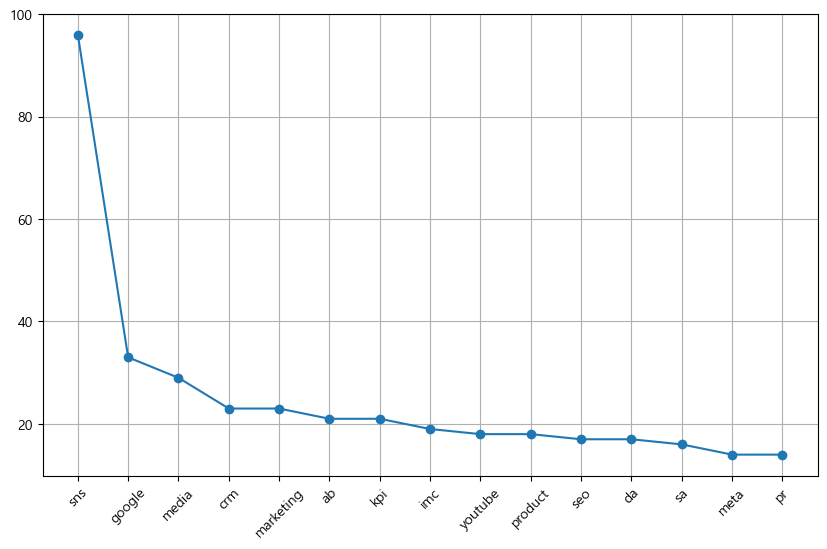

In [12]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['paid','strong','enjoy','pc','journey','work','etc','face','wallet','success','problem','solving','restful','office','back','service','skill','tool']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)